**Python version:**  3.x

In [1]:
# set the path of the directories where your modules and files are
modules_path = 'C:\\Users\loren\Documents\Progetti\__repo__\_Modules_LF95'
files_path = 'C:\\Users\loren\Documents\Progetti\Scuola\DataMining_Advanced\_files'

#### Moduli

In [2]:
import os
import sys

if os.path.isdir(modules_path) and (modules_path not in sys.path):
    sys.path.append(modules_path)

files_list = os.listdir(files_path)
print('available files for the project:', files_list, sep='\n')

%matplotlib inline

from data_science.preprocessing import df_handle
from data_science.preprocessing import data_understanding
from data_science.preprocessing import data_preparation
from data_science.modeling import unsupervised_learning
from data_science.evaluation import unsupervised_evaluation

available files for the project:
['dataset.csv', 'datatest.txt', 'datatest2.txt', 'datatraining.txt', 'test1.csv', 'test2.csv', 'training.csv']


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df = df_handle.import_df(file_name='dataset.csv', search_in_folder=files_path, date_col_name='date')
df

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,year,month,day,hour,minute,second
date,,,,,,,,,,,,
2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1,2015,2,2,14,19,0
2015-02-02 14:20:00,23.7180,26.2900,578.400000,760.400000,0.004773,1,2015,2,2,14,20,0
2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1,2015,2,2,14,21,0
2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1,2015,2,2,14,22,0
2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1,2015,2,2,14,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1,2015,2,18,9,15,0
2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1,2015,2,18,9,16,0
2015-02-18 09:17:00,20.8900,27.7450,423.500000,1521.500000,0.004237,1,2015,2,18,9,17,0


In [5]:
del df['year'], df['month'], df['day'], df['hour'], df['minute'], df['second']

In [6]:
X = df[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']].values
y = df['Occupancy']

## Light Outliers

In [7]:
df['Light'].describe()

count    20560.000000
mean       130.756622
std        210.430875
min          0.000000
25%          0.000000
50%          0.000000
75%        301.000000
max       1697.250000
Name: Light, dtype: float64

In [8]:
np.percentile(df['Light'], 99)

744.0

In [50]:
df.loc[df['Light'] > 744].loc[df['Occupancy'] == 0]

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-07 09:42:00,20.700,18.890000,1546.333333,455.333333,0.002845,0
2015-02-07 09:43:00,20.745,18.890000,1451.750000,453.000000,0.002853,0
2015-02-07 09:44:00,20.760,18.856667,829.000000,452.666667,0.002850,0


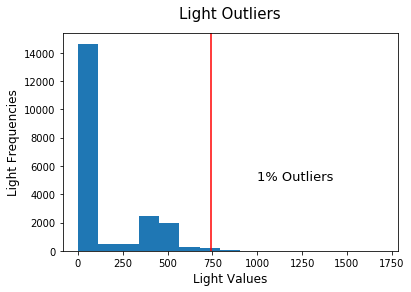

In [10]:
binsN = round(np.log2(len(df)) + 1)
plt.hist(df['Light'], bins=int(binsN))
plt.axvline(744, color='red')
plt.text(1000, 5000, '1% Outliers', size=13)
plt.title('Light Outliers', pad=15, size=15)
plt.ylabel('Light Frequencies', size=12)
plt.xlabel('Light Values', size=12)
plt.show()

## DBSCAN

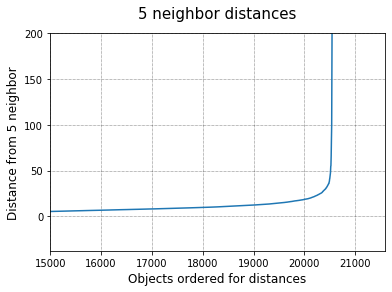

In [7]:
unsupervised_learning.kth_neighbor_distance_plot(X, kth_neighbor=5, dist_type='cityblock', ymax=200, xmin=15000)

In [7]:
dbscan = unsupervised_learning.DBSCAN(eps=25, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=25, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [8]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64),
 array([   52, 19978,   155,    21,    33,    31,    12,     5,   229,
           36,     8], dtype=int64))

In [53]:
df.loc[dbscan.labels_ == -1].loc[df['Occupancy'] == 0]

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-03 13:10:00,23.260000,25.856667,338.333333,997.333333,0.004565,0
2015-02-07 09:41:00,20.700000,18.890000,611.500000,452.250000,0.002845,0
2015-02-07 09:42:00,20.700000,18.890000,1546.333333,455.333333,0.002845,0
2015-02-07 09:43:00,20.745000,18.890000,1451.750000,453.000000,0.002853,0
2015-02-07 09:44:00,20.760000,18.856667,829.000000,452.666667,0.002850,0
2015-02-09 13:34:00,21.166667,32.790000,167.000000,1117.333333,0.005100,0
2015-02-12 08:22:00,20.600000,21.926667,24.000000,1051.333333,0.003284,0
2015-02-12 11:19:00,24.100000,22.472500,277.750000,969.500000,0.004170,0
2015-02-12 12:41:00,24.200000,22.700000,336.333333,726.333333,0.004238,0


## LOF

In [15]:
from sklearn.neighbors import LocalOutlierFactor

In [24]:
clf = LocalOutlierFactor(n_neighbors=2)
outliers = clf.fit_predict(X)

In [25]:
clf.negative_outlier_factor_

array([-2.17616372, -1.2482218 , -1.46304971, ..., -1.17312943,
       -0.92972069, -2.44041836])

In [26]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([ 3883, 16677], dtype=int64))

In [27]:
np.where(outliers==-1)

(array([    0,     6,     7, ..., 20553, 20555, 20559], dtype=int64),)

In [28]:
clf.negative_outlier_factor_[np.where(outliers==-1)]

array([-2.17616372, -1.74258633, -2.0174114 , ..., -2.42247356,
       -1.73248465, -2.44041836])

In [29]:
np.max(clf.negative_outlier_factor_[np.where(outliers==-1)])

-1.5000000236592839

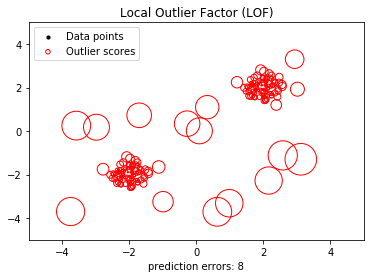

In [31]:
np.random.seed(42)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
Xa = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(Xa), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(Xa)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(Xa[:, 0], Xa[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

## X-Means

In [35]:
from pyclustering.cluster import xmeans

In [36]:
xm = xmeans.xmeans(X)
xm.process()

In [37]:
clusters = xm.get_clusters()

In [38]:
centers = xm.get_centers()

In [39]:
i = df.columns.values.tolist().index('CO2')
j = df.columns.values.tolist().index('Light')

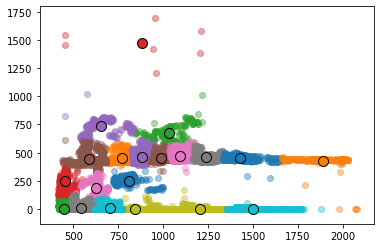

In [40]:
for indexes in clusters:
    plt.scatter(df.values[indexes,i], df.values[indexes,j], alpha=0.4)
for c in centers:
    plt.scatter(c[i], c[j], s=100, edgecolors='k')